## Import Library

In [175]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,roc_auc_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


## Data loading

In [176]:
df = pd.read_csv("weather_classification_data.csv")
df.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy


In [177]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           13200 non-null  float64
 1   Humidity              13200 non-null  int64  
 2   Wind Speed            13200 non-null  float64
 3   Precipitation (%)     13200 non-null  float64
 4   Cloud Cover           13200 non-null  object 
 5   Atmospheric Pressure  13200 non-null  float64
 6   UV Index              13200 non-null  int64  
 7   Season                13200 non-null  object 
 8   Visibility (km)       13200 non-null  float64
 9   Location              13200 non-null  object 
 10  Weather Type          13200 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.1+ MB


In [178]:
df.describe()

,Temperature,Humidity,Wind Speed,Precipitation (%),Atmospheric Pressure,UV Index,Visibility (km)
count,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000
mean,19.127576,68.710833,9.832197,53.644394,1005.827896,4.005758,5.462917
std,17.386327,20.194248,6.908704,31.946541,37.199589,3.856600,3.371499
min,-25.000000,20.000000,0.000000,0.000000,800.120000,0.000000,0.000000
25%,4.000000,57.000000,5.000000,19.000000,994.800000,1.000000,3.000000
50%,21.000000,70.000000,9.000000,58.000000,1007.650000,3.000000,5.000000
75%,31.000000,84.000000,13.500000,82.000000,1016.772500,7.000000,7.500000
max,109.000000,109.000000,48.500000,109.000000,1199.210000,14.000000,20.000000


In [179]:
df.isnull().sum()

Temperature             0
Humidity                0
Wind Speed              0
Precipitation (%)       0
Cloud Cover             0
Atmospheric Pressure    0
UV Index                0
Season                  0
Visibility (km)         0
Location                0
Weather Type            0
dtype: int64

In [180]:
df.shape

(13200, 11)

In [181]:
numerical_cols_original = df.select_dtypes(include=['int64', 'float64']).columns
print("Numerical columns for outlier checking:", numerical_cols_original)

Numerical columns for outlier checking: Index(['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)',
       'Atmospheric Pressure', 'UV Index', 'Visibility (km)'],
      dtype='object')


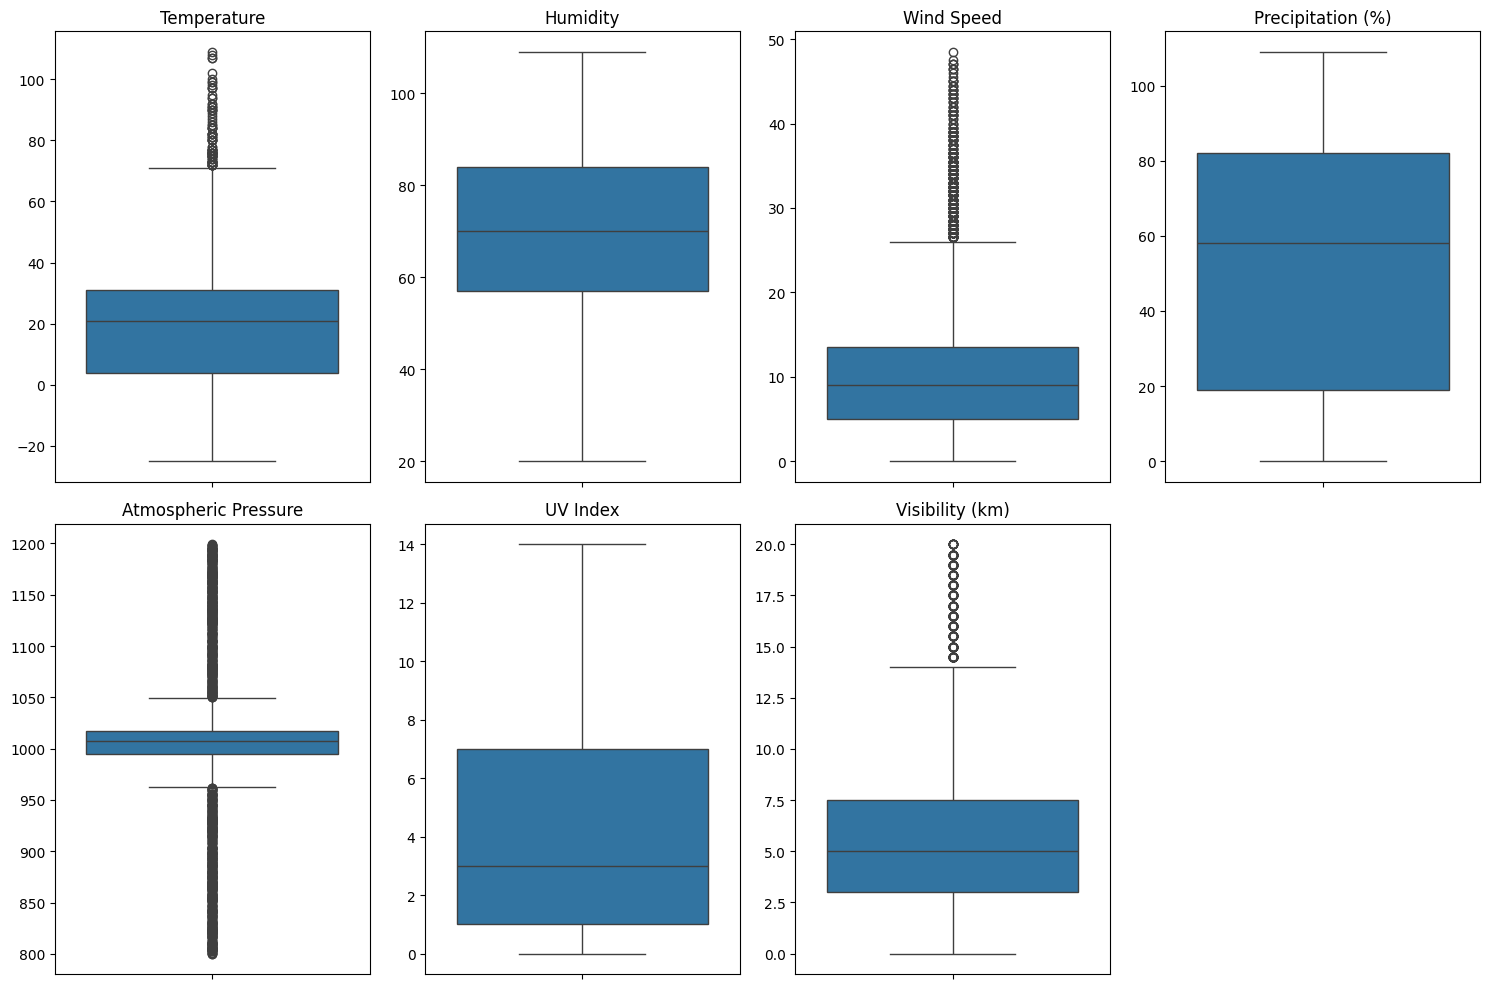


Cek Outlier.


In [182]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols_original):
    plt.subplot(2, 4, i + 1) # Sesuaikan grid subplot jika jumlah kolom berbeda
    sns.boxplot(y=df[col])
    plt.title(col)
    plt.ylabel('') # Hapus label y default agar tidak tumpang tindih

plt.tight_layout()
plt.show()

print("\nCek Outlier.")

## Data cleaning

In [183]:
df_cleaned = df.copy()

numerical_cols = df_cleaned.select_dtypes(include=np.number).columns

for col in numerical_cols:
    Q1 = df_cleaned[col].quantile(0.25)
    Q3 = df_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_cleaned = df_cleaned[(df_cleaned[col] >= lower_bound) & (df_cleaned[col] <= upper_bound)]

display(df_cleaned.head())
print(f"Original number of rows: {len(df)}")
print(f"Number of rows after outlier removal: {len(df_cleaned)}")

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy


Original number of rows: 13200
Number of rows after outlier removal: 11586


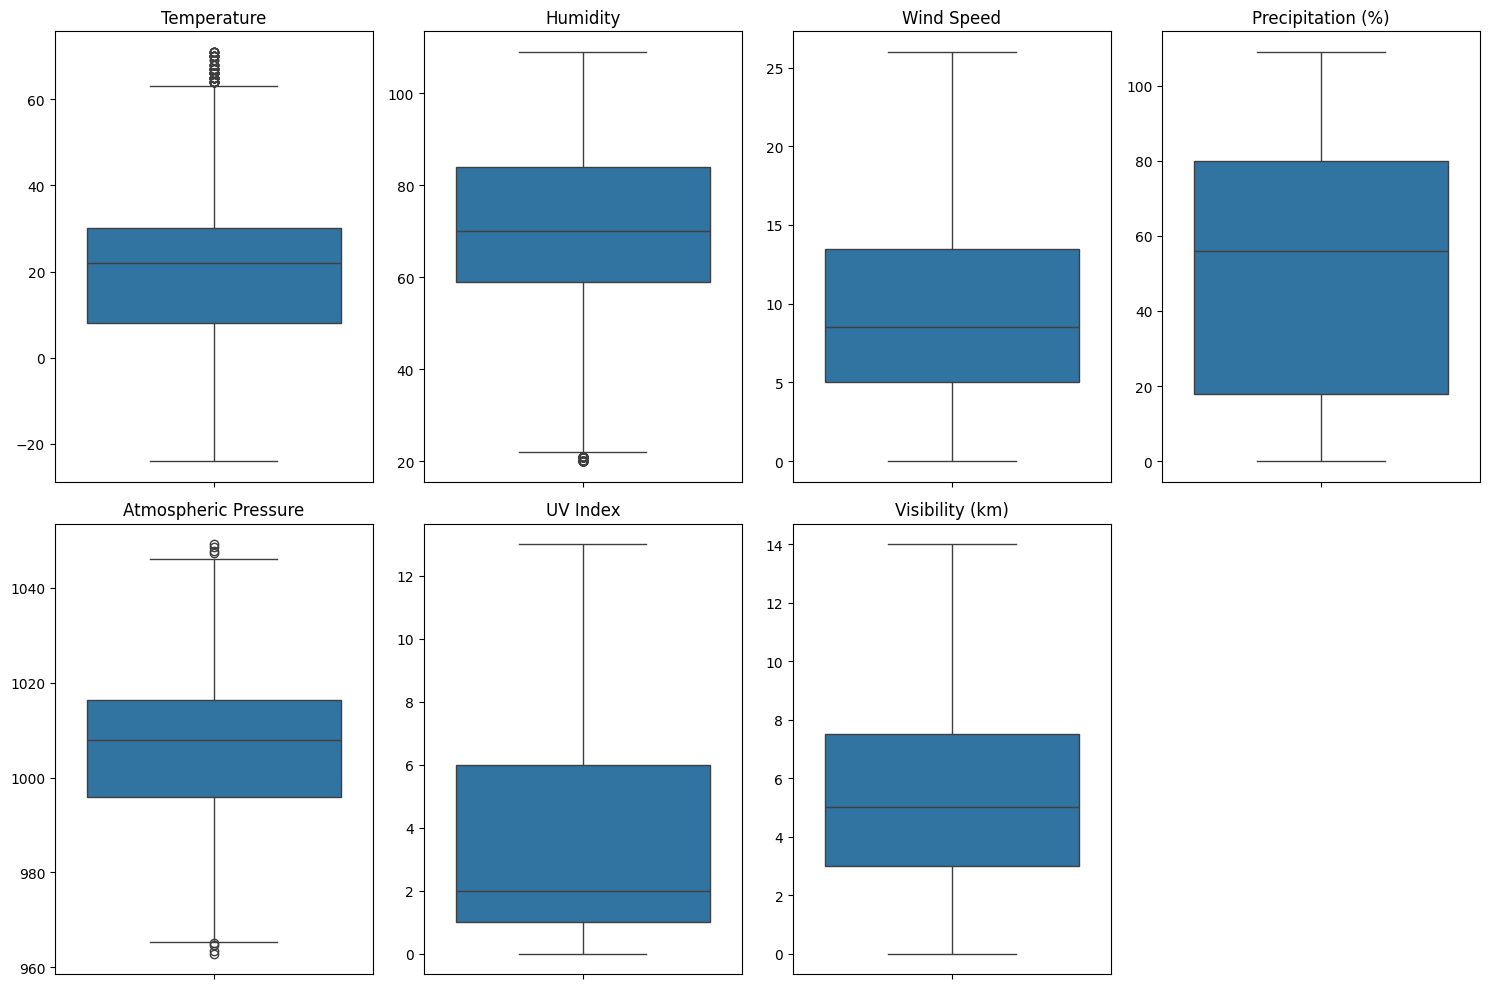


Clear Outlier.


In [184]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols_original):
    plt.subplot(2, 4, i + 1) 
    sns.boxplot(y=df_cleaned[col])
    plt.title(col)
    plt.ylabel('') 

plt.tight_layout()
plt.show()

print("\nClear Outlier.")

# EDA

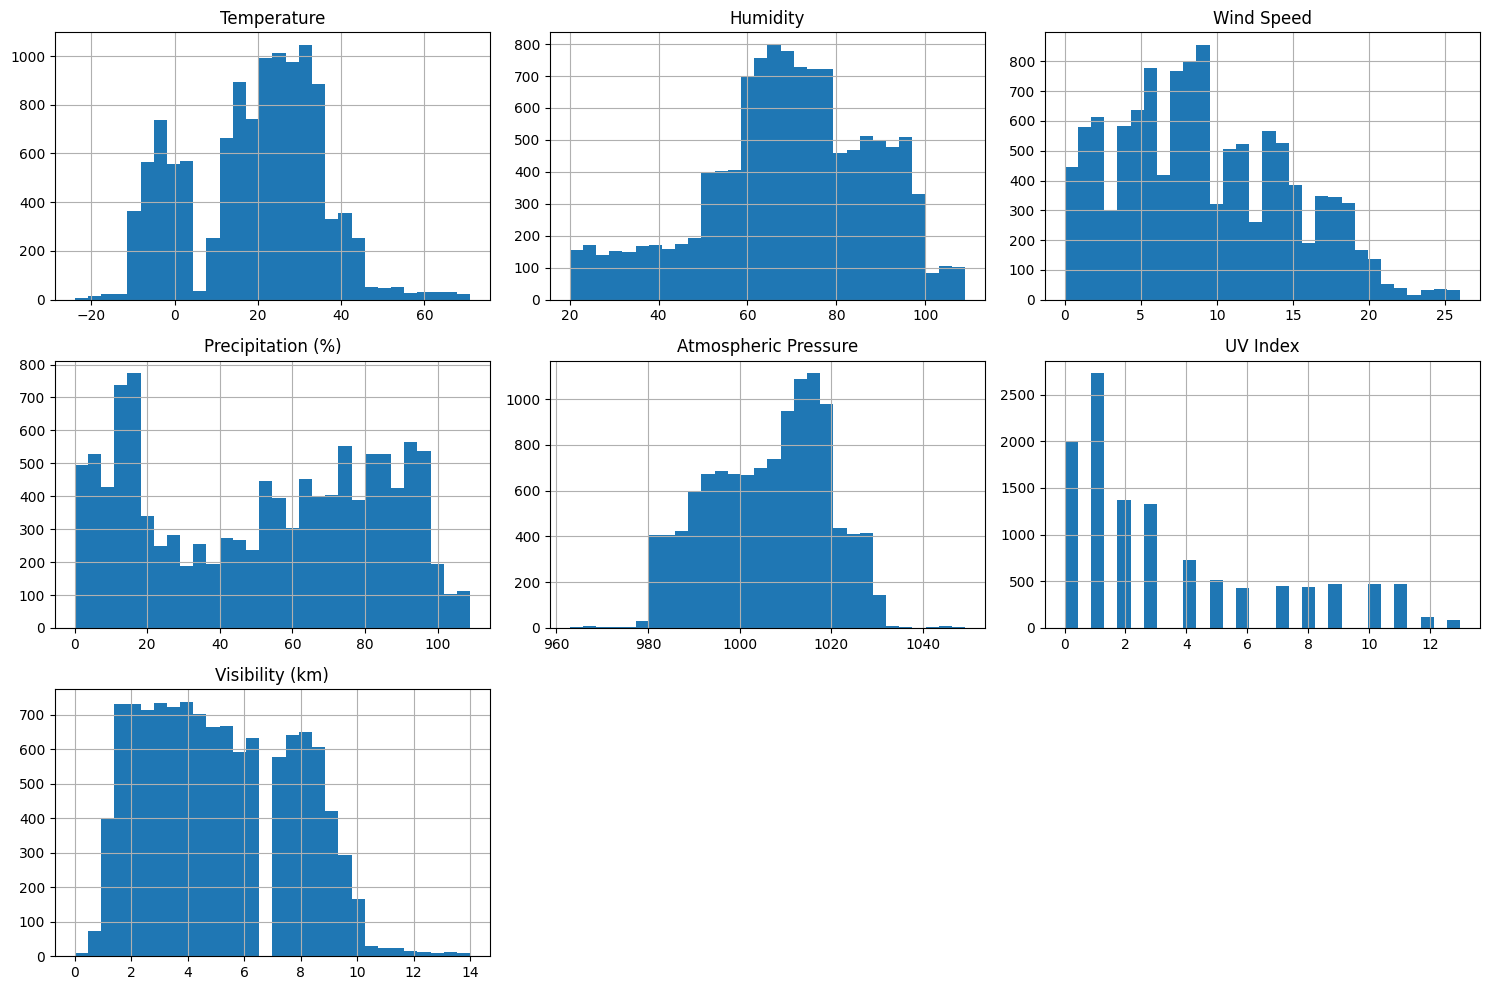

In [185]:
# 1. Histograms for numerical features
numerical_cols = df_cleaned.select_dtypes(include=np.number).columns
df_cleaned[numerical_cols].hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()

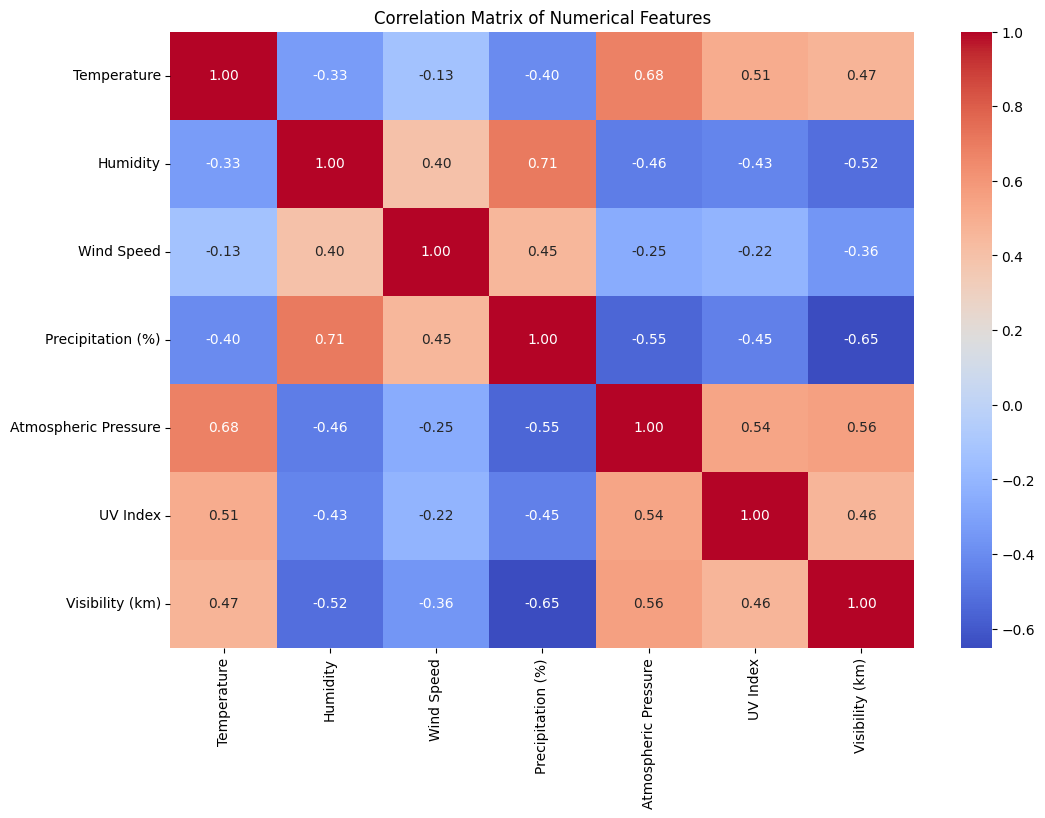

In [186]:
# 2. Correlation matrix heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df_cleaned[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

## Data preparation

In [187]:
categorical_cols = df_cleaned.select_dtypes(include='object').columns
df_processed = pd.get_dummies(df_cleaned, columns=categorical_cols, drop_first=True, dummy_na=False)
display(df_processed.head())

,Temperature,Humidity,Wind Speed,Precipitation (%),Atmospheric Pressure,UV Index,Visibility (km),Cloud Cover_cloudy,Cloud Cover_overcast,Cloud Cover_partly cloudy,Season_Spring,Season_Summer,Season_Winter,Location_inland,Location_mountain,Weather Type_Rainy,Weather Type_Snowy,Weather Type_Sunny
0,14.0,73,9.5,82.0,1010.82,2,3.5,False,False,True,False,False,True,True,False,True,False,False
1,39.0,96,8.5,71.0,1011.43,7,10.0,False,False,True,True,False,False,True,False,False,False,False
2,30.0,64,7.0,16.0,1018.72,5,5.5,False,False,False,True,False,False,False,True,False,False,True
3,38.0,83,1.5,82.0,1026.25,7,1.0,False,False,False,True,False,False,False,False,False,False,True
4,27.0,74,17.0,66.0,990.67,1,2.5,False,True,False,False,False,True,False,True,True,False,False


## Data splitting

In [188]:
X = df_processed.drop('Weather Type_Sunny', axis=1)
y = df_processed['Weather Type_Sunny']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (9268, 17)
Shape of X_test: (2318, 17)
Shape of y_train: (9268,)
Shape of y_test: (2318,)


In [189]:
from sklearn.preprocessing import StandardScaler

# Kolom numerik
numerical_cols = ['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)',
                  'Atmospheric Pressure', 'UV Index', 'Visibility (km)']

# Inisialisasi scaler dan fit ke X_train
scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test_scaled[numerical_cols] = scaler.transform(X_test[numerical_cols])


## Model training

In [190]:
# Inisialisasi model
knn_model = KNeighborsClassifier()
rf_model = RandomForestClassifier(random_state=42)
gbm_model = GradientBoostingClassifier(random_state=42)
svm_model = SVC(probability=True, class_weight='balanced', random_state=42)

# Latih model
knn_model.fit(X_train_scaled, y_train)
rf_model.fit(X_train, y_train)
gbm_model.fit(X_train, y_train)
svm_model.fit(X_train_scaled, y_train)

print("Models trained successfully.")

Models trained successfully.


## Model evaluation

In [191]:
# Predict on the test set
y_pred_knn = knn_model.predict(X_test_scaled)
y_pred_svm = svm_model.predict(X_test_scaled)
y_pred_rf = rf_model.predict(X_test)
y_pred_gbm = gbm_model.predict(X_test)

# Evaluate models
print("KNN Model Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_knn):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_knn):.4f}")
print(f"F1-score: {f1_score(y_test, y_pred_knn):.4f}\n")

print("Random Forest Model Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_rf):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_rf):.4f}")
print(f"F1-score: {f1_score(y_test, y_pred_rf):.4f}\n")

print("Gradient Boosting Model Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_gbm):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_gbm):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_gbm):.4f}")
print(f"F1-score: {f1_score(y_test, y_pred_gbm):.4f}\n")

print("SVM Model Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_svm):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_svm):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_svm):.4f}")
print(f"F1-score: {f1_score(y_test, y_pred_svm):.4f}\n")

KNN Model Evaluation:
Accuracy: 0.9814
Precision: 0.9729
Recall: 0.9551
F1-score: 0.9639

Random Forest Model Evaluation:
Accuracy: 0.9935
Precision: 0.9949
Recall: 0.9800
F1-score: 0.9874

Gradient Boosting Model Evaluation:
Accuracy: 0.9905
Precision: 0.9898
Recall: 0.9734
F1-score: 0.9815

SVM Model Evaluation:
Accuracy: 0.9927
Precision: 0.9834
Recall: 0.9884
F1-score: 0.9859



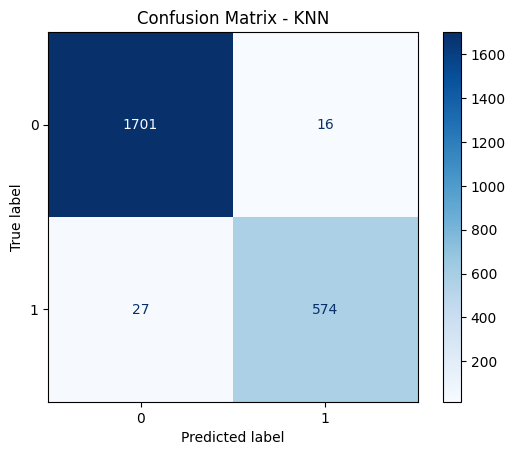

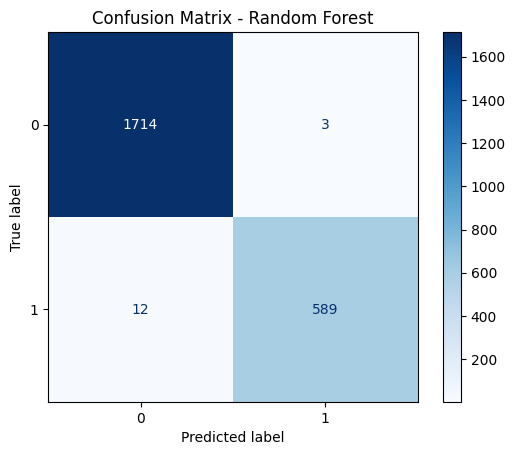

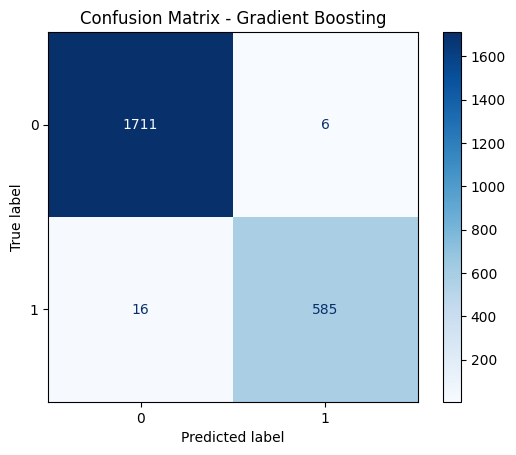

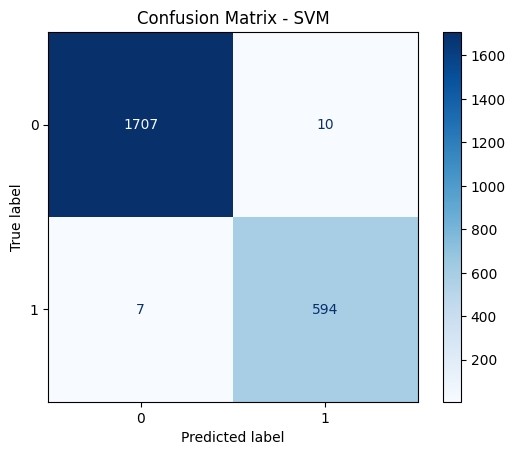

In [192]:
models = {
    'KNN': y_pred_knn,
    'Random Forest': y_pred_rf,
    'Gradient Boosting': y_pred_gbm,
    'SVM': y_pred_svm
}

# Plot confusion matrix untuk setiap model
for name, y_pred in models.items():
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Blues')
    plt.title(f'Confusion Matrix - {name}')
    plt.show()

In [193]:
# Dictionary model dan input data
model_dict = {
    'KNN': (knn_model, X_test_scaled),
    'SVM': (svm_model, X_test_scaled),
    'RandomForest': (rf_model, X_test),
    'GradientBoosting': (gbm_model, X_test)
}

# Dictionary untuk menyimpan hasil metrik
metrics = {
    'accuracy': {},
    'precision': {},
    'recall': {},
    'f1_score': {},
    'roc_auc': {}
}

# Hitung metrik untuk tiap model
for name, (model, x_data) in model_dict.items():
    y_pred = model.predict(x_data)
    y_proba = model.predict_proba(x_data)[:, 1] if hasattr(model, "predict_proba") else None

    metrics['accuracy'][name] = accuracy_score(y_test, y_pred)
    metrics['precision'][name] = precision_score(y_test, y_pred, zero_division=0)
    metrics['recall'][name] = recall_score(y_test, y_pred, zero_division=0)
    metrics['f1_score'][name] = f1_score(y_test, y_pred, zero_division=0)
    metrics['roc_auc'][name] = roc_auc_score(y_test, y_proba) if y_proba is not None else None

metrics_df = pd.DataFrame(metrics).T
print(metrics_df.round(6))

                KNN       SVM  RandomForest  GradientBoosting
accuracy   0.981450  0.992666      0.993529          0.990509
precision  0.972881  0.983444      0.994932          0.989848
recall     0.955075  0.988353      0.980033          0.973378
f1_score   0.963896  0.985892      0.987427          0.981544
roc_auc    0.994066  0.999272      0.999759          0.999290


## Inferensi

In [194]:
from sklearn.preprocessing import LabelEncoder

# Asumsikan LabelEncoder sudah fit di data training
le = LabelEncoder()
le.fit(df['Weather Type'])  

# Data baru (contoh) tanpa label 'Weather Type'
test_samples = [
    [23.0, 83, 1.5, 82.0, 1010.82, 2, 3.5, 'clear', 'Spring', 'inland'],
    [39.0, 96, 8.5, 71.0, 1011.43, 7, 10.0, 'partly cloudy', 'Summer', 'mountain'],
    [30.0, 64, 7.0, 16.0, 1018.72, 5, 5.5, 'cloudy', 'Summer', 'inland'],
]

columns = ['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)', 'Atmospheric Pressure',
           'UV Index', 'Visibility (km)', 'Cloud Cover', 'Season', 'Location']

df_new = pd.DataFrame(test_samples, columns=columns)

# Proses one-hot encoding sesuai X_train
X_new_dummies = pd.get_dummies(df_new)

# Tambahkan kolom dummy yang hilang agar kolom sesuai dengan X_train
missing_cols = set(X_train.columns) - set(X_new_dummies.columns)
for col in missing_cols:
    X_new_dummies[col] = 0

# Urutkan kolom agar sama persis dengan X_train
X_new_dummies = X_new_dummies[X_train.columns]

# Skala fitur numerik untuk model KNN dan SVM
numerical_cols = ['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)', 
                  'Atmospheric Pressure', 'UV Index', 'Visibility (km)']

X_new_dummies_scaled = X_new_dummies.copy()
X_new_dummies_scaled[numerical_cols] = scaler.transform(X_new_dummies[numerical_cols])

# Dictionary model yang sudah dilatih
model_dict = {
    'KNN': knn_model,
    'SVM': svm_model,
    'Random Forest': rf_model,
    'Gradient Boosting': gbm_model
}

# Map model ke input yang sesuai (scaled atau tidak)
model_input_map = {
    'KNN': X_new_dummies_scaled,
    'SVM': X_new_dummies_scaled,
    'Random Forest': X_new_dummies,
    'Gradient Boosting': X_new_dummies
}

# Fungsi prediksi dengan output label string
def predict_with_labels(model, input_df, label_encoder):
    preds = model.predict(input_df)
    labels = label_encoder.inverse_transform(preds)
    return labels

# Prediksi dan cetak hasil untuk semua model
for name, model in model_dict.items():
    input_data = model_input_map[name]
    preds_labels = predict_with_labels(model, input_data, le)
    print(f"Prediksi oleh {name}: {list(preds_labels)}")


Prediksi oleh KNN: ['Cloudy', 'Rainy', 'Rainy']
Prediksi oleh SVM: ['Rainy', 'Rainy', 'Rainy']
Prediksi oleh Random Forest: ['Rainy', 'Cloudy', 'Rainy']
Prediksi oleh Gradient Boosting: ['Cloudy', 'Cloudy', 'Rainy']
